### Task 1: Load Mnist training and test datasets.


In [ ]:
# Please run this first
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7907 sha256=53bd61a92a0929f9fef368407f3d4178a4a4b7c4520b3b4a087618b81ea9ca53
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


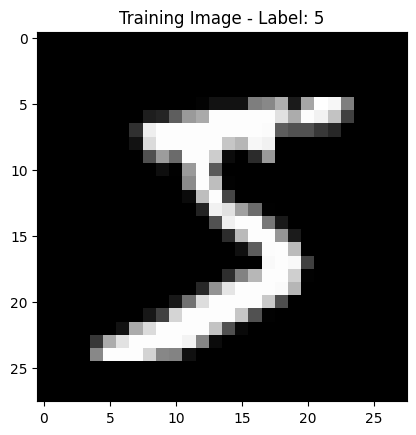

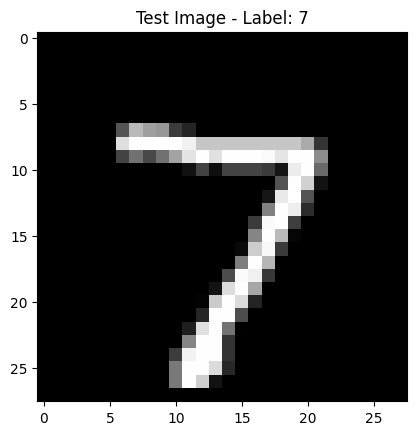

X_train shape after reshape: (60000, 784)
X_test shape after reshape: (10000, 784)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
from google.colab import drive

drive.mount('/content/drive')

# # Load the dataset files
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'


# Load images and labels
X_train = idx2numpy.convert_from_file(train_images_file)
y_train = idx2numpy.convert_from_file(train_labels_file)
X_test = idx2numpy.convert_from_file(test_images_file)
y_test = idx2numpy.convert_from_file(test_labels_file)

# Print the shape to verify loading
print(f"Train images shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")



# Question 2: Plot the first image in X_train, and the first image in X_test
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Training Image - Label: {y_train[0]}')
plt.show()

plt.imshow(X_test[0], cmap='gray')
plt.title(f'Test Image - Label: {y_test[0]}')
plt.show()



# Reshape X_train from 60000x28x28 to 60000x784
# Reshape X_test from 10000x28x28 to 10000x784

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Print shapes to confirm reshaping , Expected: (60000, 784)
print(f"X_train shape after reshape: {X_train_flat.shape}")
print(f"X_test shape after reshape: {X_test_flat.shape}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Get number of training samples and feature
num_training_samples = X_train_flat.shape[0]
num_training_features = X_train_flat.shape[1]

# Get number of test samples and features
num_test_samples = X_test_flat.shape[0]
num_test_features = X_test_flat.shape[1]

# Number of unique labels in the training set
num_classes = len(np.unique(y_train))

print(f"Training sample number: {num_training_samples}")
print(f"Feature number: {num_training_features}")
print(f"Test sample number: {num_test_samples}")
print(f"Feature number: {num_test_features}")
print(f"Class number: {num_classes}")

Training sample number: 60000
Feature number: 784
Test sample number: 10000
Feature number: 784
Class number: 10


### Predict the MNIST dataset using logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

# Load the MNIST dataset from IDX files using idx2numpy
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

# Load images and labels
X_train = idx2numpy.convert_from_file(train_images_file)
y_train = idx2numpy.convert_from_file(train_labels_file)
X_test = idx2numpy.convert_from_file(test_images_file)
y_test = idx2numpy.convert_from_file(test_labels_file)

# Reshape the images from 28x28 to 784 pixels
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Define the logistic regression model and parameters for GridSearchCV
logistic = LogisticRegression(max_iter=50)

param_grid = {
    'C': [0.1, 1],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV with the specified parameters and verbose output
grid_search = GridSearchCV(logistic, param_grid, cv=3, verbose=3)

# Perform grid search and track the total time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Output the best parameters and the total time for tuning
print(f"Total time for hyperparameter tuning: {end_time - start_time}")
print(f"Best hyperparameters: {grid_search.best_params_}")



Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.909 total time= 1.1min
[CV 2/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.911 total time= 1.0min
[CV 3/3] END C=0.1, penalty=l1, solver=liblinear;, score=0.913 total time=  59.3s
[CV 1/3] END .C=1, penalty=l1, solver=liblinear;, score=0.907 total time= 1.1min
[CV 2/3] END .C=1, penalty=l1, solver=liblinear;, score=0.909 total time= 1.2min
[CV 3/3] END .C=1, penalty=l1, solver=liblinear;, score=0.911 total time= 1.1min
Total time for hyperparameter tuning: 476.1567599773407
Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# get the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# use the best hyperparameters to train a final model.
best_params = grid_search.best_params_

# start a Logistic Regression model with the best hyperparameters
final_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], max_iter=50)

# Measure the time to train the model
start_time = time.time()
final_model.fit(X_train, y_train)
end_time = time.time()
print(f"Total time for training: {end_time - start_time}")

Total time for training: 89.18967366218567


In [ ]:
# Compute the recall for each class on test set
from sklearn.metrics import confusion_matrix

# Use the final model to predict the test set
y_pred = final_model.predict(X_test)

# Compute recall
report = classification_report(y_test, y_pred, output_dict=True)

# Print recall rates for each class
for i in range(10):
    print(f"Recall class {i}: {report[str(i)]['recall']}")

Recall class 0: 0.9795918367346939
Recall class 1: 0.9788546255506608
Recall class 2: 0.8846899224806202
Recall class 3: 0.9128712871287129
Recall class 4: 0.9317718940936863
Recall class 5: 0.8621076233183856
Recall class 6: 0.9509394572025052
Recall class 7: 0.9173151750972762
Recall class 8: 0.8737166324435318
Recall class 9: 0.8850346878097126


### Predicting the MNIST dataset Artificial Neural Network with fully connected layers.


In [ ]:
# Step 1 Dataset and DataLoader


import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

import idx2numpy
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'

# Load images and labels
X_train = idx2numpy.convert_from_file(train_images_file)
y_train = idx2numpy.convert_from_file(train_labels_file)

# Normalize images (from 0-255 to 0-1) and convert to PyTorch tensors for the model
X_train = torch.tensor(X_train, dtype=torch.float32) / 255.0
y_train = torch.tensor(y_train, dtype=torch.long)

# Check shapes
print(f"Shape of X_train before reshaping: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Flatten the images from (28, 28) to (784,) for all images
X_train = X_train.view(X_train.size(0), -1)

# Check shapes again after reshaping just to double check everything works
print(f"Shape of X_train after reshaping: {X_train.shape}")

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Fetch the first batch of images and labels
images, labels = next(iter(train_loader))

# Print the shape of the first batch of images and labels
print(f"Batch of images shape: {images.shape}")
print(f"Batch of labels shape: {labels.shape}")


Shape of X_train before reshaping: torch.Size([60000, 28, 28])
Shape of y_train: torch.Size([60000])
Shape of X_train after reshaping: torch.Size([60000, 784])
Batch of images shape: torch.Size([64, 784])
Batch of labels shape: torch.Size([64])


### Designing a neural network with 3 fully connected layers.


In [ ]:
import torch
import torch.nn as nn


class NeuralNetwork(nn.Module):
  # First fully connected layer (input size: 784) Second fully connected layer (input size: 128),
  # Output layer (output size: 10 classes for MNIST) ReLU activation function
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

        # First layer + ReLU, Second layer + ReLU and final layer, no activation function
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetwork().to(device)

print("Model architecture:")
print(model)


Model architecture:
NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


### Train the model for 10 epochs


Epoch [1/10], Train Loss: 0.3388, Train Accuracy: 0.9046, Test Loss: 0.1632, Test Accuracy: 0.9518
Epoch [2/10], Train Loss: 0.1447, Train Accuracy: 0.9560, Test Loss: 0.1206, Test Accuracy: 0.9644
Epoch [3/10], Train Loss: 0.0996, Train Accuracy: 0.9698, Test Loss: 0.1014, Test Accuracy: 0.9683
Epoch [4/10], Train Loss: 0.0733, Train Accuracy: 0.9780, Test Loss: 0.0991, Test Accuracy: 0.9694
Epoch [5/10], Train Loss: 0.0582, Train Accuracy: 0.9824, Test Loss: 0.0862, Test Accuracy: 0.9737
Epoch [6/10], Train Loss: 0.0480, Train Accuracy: 0.9848, Test Loss: 0.0774, Test Accuracy: 0.9764
Epoch [7/10], Train Loss: 0.0384, Train Accuracy: 0.9880, Test Loss: 0.0980, Test Accuracy: 0.9711
Epoch [8/10], Train Loss: 0.0318, Train Accuracy: 0.9898, Test Loss: 0.0880, Test Accuracy: 0.9747
Epoch [9/10], Train Loss: 0.0276, Train Accuracy: 0.9912, Test Loss: 0.0835, Test Accuracy: 0.9763
Epoch [10/10], Train Loss: 0.0226, Train Accuracy: 0.9926, Test Loss: 0.0827, Test Accuracy: 0.9768
Total tim

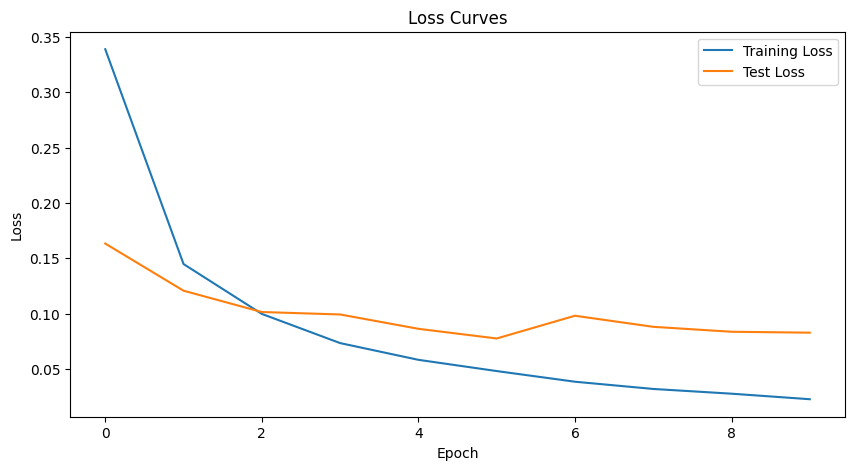

In [ ]:
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import idx2numpy

# Load the MNIST dataset from IDX files using idx2numpy
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

# Load images and labels
X_train = idx2numpy.convert_from_file(train_images_file)
y_train = idx2numpy.convert_from_file(train_labels_file)
X_test = idx2numpy.convert_from_file(test_images_file)
y_test = idx2numpy.convert_from_file(test_labels_file)

# Normalize and convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 28*28) / 255.0
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 28*28) / 255.0
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders for training and test datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_loss_history = []
test_loss_history = []
train_acc_history = []
test_acc_history = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy and loss
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Average loss and accuracy for the epoch
    avg_train_loss = train_loss / total_train
    train_accuracy = correct_train / total_train
    train_loss_history.append(avg_train_loss)
    train_acc_history.append(train_accuracy)

    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # accuracy and loss calc
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = test_loss / total_test
    test_accuracy = correct_test / total_test
    test_loss_history.append(avg_test_loss)
    test_acc_history.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Loss: {avg_test_loss:.4f}, "
          f"Test Accuracy: {test_accuracy:.4f}")

end_time = time.time()
print(f"Total time for training: {end_time - start_time:.4f} seconds")

# Plot the loss curves
plt.figure(figsize=(10,5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:

from sklearn.metrics import recall_score

# After evaluating the test set and obtaining all predictions//labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Store all predictions and true labels
        all_preds.append(predicted.cpu())
        all_labels.append(labels.cpu())

# Concatenate all predictions and labels
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

# Compute recall
recall_per_class = recall_score(all_labels.numpy(), all_preds.numpy(), average=None)

# Print the recall

for i, recall in enumerate(recall_per_class):
    print(f"Recall class {i}: {recall}")

Recall class 0: 0.9918367346938776
Recall class 1: 0.9947136563876652
Recall class 2: 0.9689922480620154
Recall class 3: 0.9752475247524752
Recall class 4: 0.9694501018329938
Recall class 5: 0.968609865470852
Recall class 6: 0.9770354906054279
Recall class 7: 0.9591439688715954
Recall class 8: 0.9774127310061602
Recall class 9: 0.9831516352824579


I was doing q1 with
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

X_train = load_idx(train_images_file)
y_train = load_idx(train_labels_file)
X_test = load_idx(test_images_file)
y_test = load_idx(test_labels_file)

but it was taking too long and so I cutted the amount of information I was fitting the models

### Compare LR and Neural Network in Recall and Time.


In [ ]:

import struct
import numpy as np
import time
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Helper function to load IDX files
def load_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Load the dataset from IDX files
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'

X_train = load_idx(train_images_file)
y_train = load_idx(train_labels_file)
X_test = load_idx(test_images_file)
y_test = load_idx(test_labels_file)

# Reshape the data if needed
X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)

# Split the data to use only 25% of the original training data
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

# Scale the data for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model with faster 'saga' solver
lr = LogisticRegression(max_iter=10000, solver='saga', n_jobs=-1)

# Measure training time for LR
start_time = time.time()
lr.fit(X_train, y_train)
lr_train_time = time.time() - start_time

# Make predictions with LR
y_pred_lr = lr.predict(X_test)

# Calculate the recall per class for LR
recall_lr = recall_score(y_test, y_pred_lr, average=None)

# Neural network model with early stopping
nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, early_stopping=True, batch_size=256, solver='adam')

# Measure training time for NN
start_time = time.time()
nn.fit(X_train_scaled, y_train)
nn_train_time = time.time() - start_time

# Make predictions with NN
y_pred_nn = nn.predict(X_test_scaled)

# Calculate recall per class for NN
recall_nn = recall_score(y_test, y_pred_nn, average=None)

# Display results in markdown format
print("| Model               | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | Train Time   |")
print("|---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------------|")
print(f"| Logistic Regression | {recall_lr[0]:.3f} | {recall_lr[1]:.3f} | {recall_lr[2]:.3f} | {recall_lr[3]:.3f} | {recall_lr[4]:.3f} | {recall_lr[5]:.3f} | {recall_lr[6]:.3f} | {recall_lr[7]:.3f} | {recall_lr[8]:.3f} | {recall_lr[9]:.3f} | {lr_train_time:.3f} seconds |")
print(f"| Neural Network      | {recall_nn[0]:.3f} | {recall_nn[1]:.3f} | {recall_nn[2]:.3f} | {recall_nn[3]:.3f} | {recall_nn[4]:.3f} | {recall_nn[5]:.3f} | {recall_nn[6]:.3f} | {recall_nn[7]:.3f} | {recall_nn[8]:.3f} | {recall_nn[9]:.3f} | {nn_train_time:.3f} seconds |")


| Model               | 0      | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | Train Time   |
|---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------------|
| Logistic Regression | 0.963 | 0.970 | 0.857 | 0.878 | 0.892 | 0.821 | 0.925 | 0.886 | 0.817 | 0.862 | 1120.909 seconds |
| Neural Network      | 0.983 | 0.989 | 0.930 | 0.941 | 0.956 | 0.930 | 0.967 | 0.943 | 0.922 | 0.921 | 5.196 seconds |
